In [42]:
# Import packages
import urllib.request, json 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone
import pandas as pd

pd.options.display.max_rows = 100

# Set of stations (the ones that are less than 5 minutes far away from my place)
stations = [
    'velov-4005',
    'velov-4022',
    'velov-1036',
    'velov-4041'
]

# Time window in the API call
now = datetime.now(timezone.utc) + timedelta(hours=1)
start = (now - timedelta(days=7)).strftime('%Y-%m-%dT%H:%M:%S+0100')
end = now.strftime('%Y-%m-%dT%H:%M:%S+0100')

# Initiate empty df
df = pd.DataFrame()

# For each station, add a column in df
for station_code in stations:
    
    url = "https://download.data.grandlyon.com/sos/velov?service=SOS&version=1.0.0&request=GetObservation&offering=reseau_velov&procedure={}&observedProperty=bikes&responseFormat=application/json&eventTime={}/{}".format(
            station_code, 
            start, 
            end
    )

    with urllib.request.urlopen(url) as response:
        data = json.loads(response.read().decode())
    
    data = data['ObservationCollection']['member'][0]['result']['DataArray']['values']
    
    df[station_code] = pd.Series([data[i][1] for i in range(len(data))], dtype='float32')
    
# Time-based index
df['time'] = pd.Series([data[i][0] for i in range(len(data))])
tb_idx = pd.DatetimeIndex(df['time'])
df.index = tb_idx

,velov-4005,velov-4022,velov-1036,velov-4041,time
0,1.0,4.0,16.0,15.0,2019-12-01T13:30:00+01:00
1,1.0,2.0,14.0,13.0,2019-12-01T13:35:00+01:00
2,1.0,2.0,13.0,14.0,2019-12-01T13:40:00+01:00
3,0.0,2.0,13.0,14.0,2019-12-01T13:45:00+01:00
4,1.0,2.0,13.0,14.0,2019-12-01T13:50:00+01:00
5,1.0,2.0,11.0,13.0,2019-12-01T13:55:00+01:00
6,1.0,2.0,11.0,13.0,2019-12-01T14:00:00+01:00
7,1.0,1.0,11.0,11.0,2019-12-01T14:05:00+01:00
8,1.0,1.0,11.0,11.0,2019-12-01T14:10:00+01:00
9,1.0,1.0,10.0,11.0,2019-12-01T14:15:00+01:00


Text(0, 0.5, 'Available bikes')

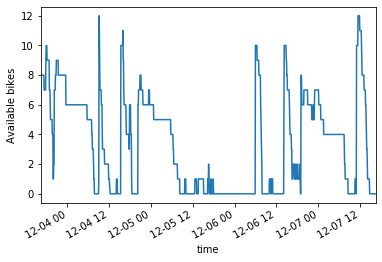

In [55]:
# Display the evolution of the number of available bikes from Dec 3rd at 16:30 to Dec 7th at 16:30.
ax = df.loc[datetime(2019,12,3,16,30):datetime(2019,12,7,16,30), 'velov-4005'].plot()
ax.set_ylabel('Available bikes')